In [19]:

from imageio import imread, imwrite
import matplotlib.pyplot as plt
import astimp
import astimp_tools
draw = astimp_tools.draw

img_path = "../PFA/tests/images/test0.jpg"
img = imread(img_path)

In [20]:
# Print the real diameter of the antibiotic disks in millimeters
# This parameter is used to get the scale of the image

print("Antibiotic disk diameter:", astimp.config.Pellets_DiamInMillimeters, "mm")

Antibiotic disk diameter: 6.0 mm


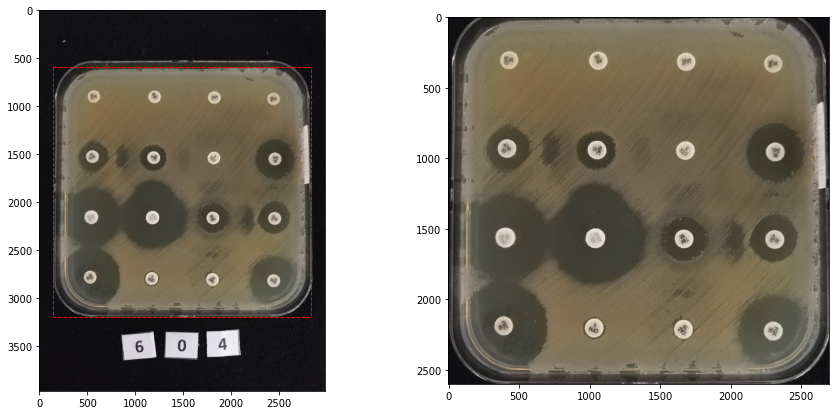

In [21]:
img = imread(img_path)

fig, axs = plt.subplots(1,2,figsize=(15,7))
axs[0].imshow(img)
petri = astimp.getPetriDish(img)
draw(petri, axs[0])
axs[1].imshow(petri.img);

In [22]:
# Find the positions of the antibiotic disks in the image

crop = petri.img
circles = astimp.find_atb_pellets(crop)
print("Antibiotic disks found:", len(circles))
print()

i=0
print("disk",i)
print("- center:", circles[i].center)
print("- radius:", circles[i].radius)

# calculate the image scale
print()
print(f"image scale: {SEG.get_mm_per_px(circles):.2f} mm/px" )

Antibiotic disks found: 16

disk 0
- center: (2303.36376953125, 2224.565185546875)
- radius: 67.19107055664062

image scale: 0.04 mm/px


16


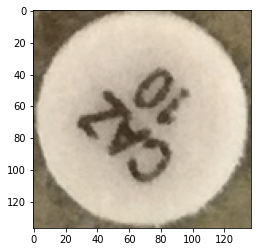

In [23]:
# Extract the sub-image of one pellet

pellets = [astimp.cutOnePelletInImage(crop, circle) for circle in circles]

print(len(pellets))
plt.imshow(pellets[1])


In [24]:
# Get the antibiotic labels

labels = [astimp.getOnePelletText(pellet) for pellet in pellets]
print("label", labels[4].text, f"score = {labels[4].confidence:.3f}")

label FEP30 score = 1.000


scale of the image: 22 px/mm


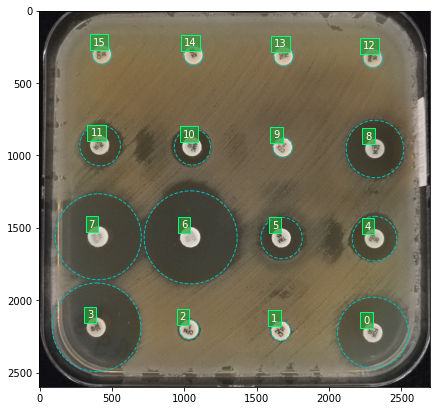

In [25]:
plt.figure(figsize=(7,7))

ast = astimp.AST(img)
draw(ast, atb_labels='number')

print(f"scale of the image: {ast.px_per_mm:.0f} px/mm")

In [26]:
print("Inhibition diameters")
for i in range(len(ast.circles)):
    print(f"{ast.labels[i].text}:\t{ast.inhibitions[i].diameter:.0f}")

Inhibition diameters
FOX30:	22
CAZ10:	6
CFM5:	6
FEC40:	27
FEP30:	14
TIM85:	13
ETP10:	29
IPM10:	27
TPZ36:	18
CTX5:	6
AMC30:	11
ATM30:	13
PRL30:	6
TIC75:	6
AX20:	6
CFR30:	6


Inhibition diameters
0:	19
1:	20


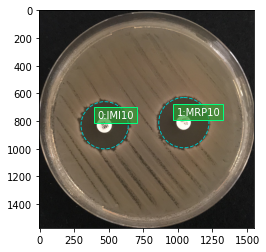

In [27]:
path = "../PFA/tests/images/20180716-ECO-207.JPG"
img = imread(path)  # load image

ast = astimp.AST(img)
print("Inhibition diameters")
for i in range(len(ast.circles)):
    print(f"{i}:\t{ast.inhibitions[i].diameter:.0f}")
draw(ast)

ATB : IMI10, inhibition diameter: 19.0mm
Inhibition diameters
IMI10:	19
MRP10:	20


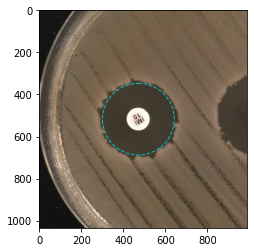

In [28]:
# Print the first antibiotic disk

idx = 0
atb = ast.get_atb_by_idx(idx)
print(atb)
draw(atb)
print("Inhibition diameters")
for i in range(len(ast.circles)):
    print(f"{ast.labels[i].text}:\t{ast.inhibitions[i].diameter:.0f}")

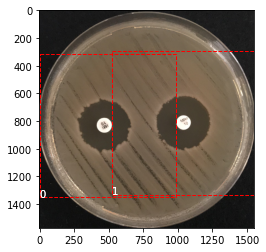

In [29]:
# Plot all the ROIs found in the plate
path = "../PFA/tests/images/20180716-ECO-207.JPG"
img = imread(path)  # load image
ast = astimp.AST(img)
plt.imshow(ast.crop)
for idx,roi in enumerate(ast.rois):
  draw(roi, text=idx)

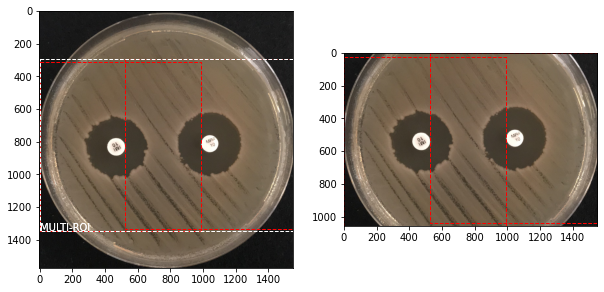

In [30]:
# ROIs support arithmetic sum

plt.figure(figsize=(10,5))

# The sum of ROIs is a ROI
roi = ast.rois[0] + ast.rois[1]

# Draw single rois
plt.subplot(1,2,1)
plt.imshow(ast.crop)
for sub_ROI in roi.abs_sub_ROIs:
  draw(sub_ROI)

draw(roi, text='MULTI-ROI', ec="w")

# Plot the region in the white ROI, which includes both red ones
plt.subplot(1,2,2)
plt.imshow(astimp_tools.image.subimage_by_roi(ast.crop,roi))

# Plot the red subrois
for subroi in roi.sub_ROIs:
    draw(subroi)

real center: (1056.5, 1056.5) radius 68.5


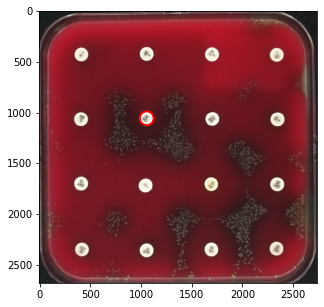

In [31]:
img_path = "../PFA/tests/images/test_blood_agar_0.jpg"
img = imread(img_path) #load image

crop = astimp.getPetriDish(img).img  # crop Petri Dish
circles = astimp.find_atb_pellets(crop)  # find antibiotic disks
mm_per_px = astimp.get_mm_per_px(circles) # get the image scale
# Identiy the center coordinates of the antibiotic disk
# by drawing a red dot on it

plt.figure(figsize=(5,5))

x = 1050 # disk center x-coordinate
y = 950 # disk center y-coodrinate
# Detect the pellet real center and radius


c = astimp.searchOnePellet(crop,x,y,mm_per_px)

print("real center:", c.center, "radius", c.radius)
ax = plt.gca()
cx,cy = c.center
r = c.radius
c = plt.Circle((cx,cy),r, ec='r', lw=2, fc=None, fill=False)
ax.add_artist(c);
plt.imshow(crop, cmap='gray')

